**Simple Linear Regression**

In [1]:
import numpy as np

class SimpleLinearRegression:
    def fit(self, X, y):
        """
        Fit the linear regression model to the training data.
        """
        # Calculate the mean of X and y
        self.mean_X = np.mean(X)
        self.mean_y = np.mean(y)

        # Calculate the slope (beta_1) and intercept (beta_0) of the regression line
        numerator = np.sum((X - self.mean_X) * (y - self.mean_y))
        denominator = np.sum((X - self.mean_X) ** 2)
        self.beta_1 = numerator / denominator
        self.beta_0 = self.mean_y - self.beta_1 * self.mean_X

    def predict(self, X):
        """
        Predict the target variable for new data.
        """
        return self.beta_0 + self.beta_1 * X

def main():
    # Example data
    X = np.array([1, 2, 3, 4, 5])
    y = np.array([2, 3, 4, 5, 6])

    # Create and fit the linear regression model
    model = SimpleLinearRegression()
    model.fit(X, y)

    # Predict target variable for new data
    new_X = np.array([6, 7, 8])
    predictions = model.predict(new_X)
    print("Predictions:", predictions)

if __name__ == "__main__":
    main()

Predictions: [7. 8. 9.]


**Linear Regression**

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Assume you have independent variables X and a dependent variable y
X = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]])
y = np.array([1, 2, 3, 4])

# Create an instance of the LinearRegression class
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Print the coefficients of the model
print(reg.coef_)


[0.33333333 0.33333333 0.33333333]


**Multiple Linear Regression**

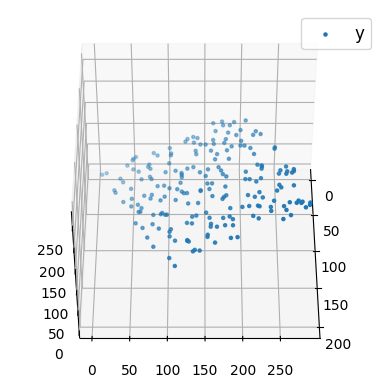

In [5]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def generate_dataset(n):
	x = []
	y = []
	random_x1 = np.random.rand()
	random_x2 = np.random.rand()
	for i in range(n):
		x1 = i
		x2 = i/2 + np.random.rand()*n
		x.append([1, x1, x2])
		y.append(random_x1 * x1 + random_x2 * x2 + 1)
	return np.array(x), np.array(y)

x, y = generate_dataset(200)

mpl.rcParams['legend.fontsize'] = 12

fig = plt.figure()
ax = fig.add_subplot(projection ='3d')

ax.scatter(x[:, 1], x[:, 2], y, label ='y', s = 5)
ax.legend()
ax.view_init(45, 0)

plt.show()


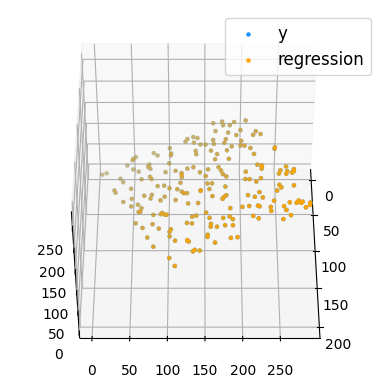

In [6]:
def mse(coef, x, y):
	return np.mean((np.dot(x, coef) - y)**2)/2


def gradients(coef, x, y):
	return np.mean(x.transpose()*(np.dot(x, coef) - y), axis=1)


def multilinear_regression(coef, x, y, lr, b1=0.9, b2=0.999, epsilon=1e-8):
	prev_error = 0
	m_coef = np.zeros(coef.shape)
	v_coef = np.zeros(coef.shape)
	moment_m_coef = np.zeros(coef.shape)
	moment_v_coef = np.zeros(coef.shape)
	t = 0

	while True:
		error = mse(coef, x, y)
		if abs(error - prev_error) <= epsilon:
			break
		prev_error = error
		grad = gradients(coef, x, y)
		t += 1
		m_coef = b1 * m_coef + (1-b1)*grad
		v_coef = b2 * v_coef + (1-b2)*grad**2
		moment_m_coef = m_coef / (1-b1**t)
		moment_v_coef = v_coef / (1-b2**t)

		delta = ((lr / moment_v_coef**0.5 + 1e-8) *
				(b1 * moment_m_coef + (1-b1)*grad/(1-b1**t)))

		coef = np.subtract(coef, delta)
	return coef


coef = np.array([0, 0, 0])
c = multilinear_regression(coef, x, y, 1e-1)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x[:, 1], x[:, 2], y, label='y',
		s=5, color="dodgerblue")

ax.scatter(x[:, 1], x[:, 2], c[0] + c[1]*x[:, 1] + c[2]*x[:, 2],
		label='regression', s=5, color="orange")

ax.view_init(45, 0)
ax.legend()
plt.show()


**Linear Regression**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import t as t_fun

In [15]:
class LinearRegression:

    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept

    def _prepare_X(self, X):
        X = np.array(X)
        if len(X.shape) == 1:
            X = np.atleast_2d(X).reshape((-1, 1))
        if self.fit_intercept:
            ones = np.ones((X.shape[0], 1))
            X = np.column_stack((ones, X))
        else:
            pass
        return X

**Linear Regression**

In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Generate a sample dataset (you would typically load your own dataset)
data = {'X1': [1, 2, 3, 4, 5],
        'X2': [2, 3, 4, 5, 6],
        'Y': [3, 5, 7, 9, 11]}

df = pd.DataFrame(data)

# Split the data into independent variables (X) and the dependent variable (Y)
X = df[['X1', 'X2']]
Y = df['Y']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred, squared=False))

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Coefficients: [1. 1.]
Intercept: -1.7763568394002505e-15


**OLS Regression**

In [24]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()


Saving 50_Startups.csv to 50_Startups.csv


In [25]:
df = pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [26]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelBinarizer
mapper = DataFrameMapper(
        [('State',
          LabelBinarizer()
         )
        ],
    default=None,
    df_out=True
    )
df = mapper.fit_transform(df)
df = df[df.columns[1:]]
df.head()

,State_Florida,State_New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,165349.20,136897.80,471784.10,192261.83
1,0,0,162597.70,151377.59,443898.53,191792.06
2,1,0,153441.51,101145.55,407934.54,191050.39
3,0,1,144372.41,118671.85,383199.62,182901.99
4,1,0,142107.34,91391.77,366168.42,166187.94


In [27]:
from sklearn.model_selection import train_test_split
idx_train, idx_test = train_test_split(
    df.index,
    test_size=0.2,
    random_state=0)
df_train = df.iloc[idx_train].sort_index()
df_test = df.iloc[idx_test].sort_index()
df_train.head()

,State_Florida,State_New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,165349.20,136897.80,471784.10,192261.83
1,0,0,162597.70,151377.59,443898.53,191792.06
3,0,1,144372.41,118671.85,383199.62,182901.99
5,0,1,131876.90,99814.71,362861.36,156991.12
6,0,0,134615.46,147198.87,127716.82,156122.51


In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(
    df_train[df.columns[:-1]].values,
    df_train[[df.columns[-1]]].values)

LinearRegression()

In [29]:
y_pred = regressor.predict(
    df_test[df.columns[:-1]].values)
y_pred

array([[178537.48221057],
       [167921.06569552],
       [132447.73845175],
       [132582.27760816],
       [113969.43533013],
       [116161.24230165],
       [103015.20159795],
       [ 98791.73374687],
       [ 67851.69209676],
       [ 71976.09851258]])

In [30]:
df_test[['Profit']]

,Profit
2,191050.39
4,166187.94
10,146121.95
11,144259.40
22,110352.25
27,105008.31
28,103282.38
31,97483.56
38,81229.06
41,77798.83


In [31]:
import statsmodels.formula.api as sm
df.insert(0, 'Ones', 1)
df.head()

,Ones,State_Florida,State_New York,R&D Spend,Administration,Marketing Spend,Profit
0,1,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,1,1,0,153441.51,101145.55,407934.54,191050.39
3,1,0,1,144372.41,118671.85,383199.62,182901.99
4,1,1,0,142107.34,91391.77,366168.42,166187.94


In [33]:
import statsmodels.api as sm
def backwardElimination(df, SL):
    df_opt = df.copy()
    inVars = df.columns.tolist()[:-2]
    numVars = len(inVars)
    while True:
        regressor = sm.OLS(
            endog=df_opt[['Profit']].values,
            exog=df_opt[inVars]).fit()
        if regressor.pvalues.max() < SL:
            break
        inVars.remove(regressor.pvalues.idxmax())
    cols = inVars
    cols.append(df.columns[-1])
    print(regressor.summary())
    return df_opt[cols]

df_opt = backwardElimination(df, 0.05)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 16 Mar 2024   Prob (F-statistic):           3.50e-32
Time:                        13:49:51   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ones        4.903e+04   2537.897     19.320      0.0

In [34]:
idx_train, idx_test = train_test_split(
    df_opt.index,
    test_size=0.2,
    random_state=0)

df_train = df_opt.iloc[idx_train]
df_test = df_opt.iloc[idx_test]

regressor = LinearRegression()
regressor.fit(
    df_train[df_train.columns[:-1]].values,
    df_train[df_train.columns[-1:]].values)

regressor.predict(
    df_test[df_test.columns[:-1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[104667.27805998],
       [134150.83410578],
       [135207.80019517],
       [ 72170.54428856],
       [179090.58602508],
       [109824.77386586],
       [ 65644.27773757],
       [100481.43277139],
       [111431.75202432],
       [169438.14843539]])

In [35]:
df_test[df_test.columns[-1:]]

,Profit
28,103282.38
11,144259.40
10,146121.95
41,77798.83
2,191050.39
27,105008.31
38,81229.06
31,97483.56
22,110352.25
4,166187.94
